# Fremont Bridge Analysis

Analysis of bike traffic on Fremont Bridge, Seattle.

Simplified version of analysis by *Jake VanderPlas*, *University of Washington eScience Institute*:

* https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/
* https://github.com/jakevdp/JupyterWorkflow


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd


## Get the data

In [2]:
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='../data/raw/Fremont.csv', url=FREMONT_URL, force_download=False):
    import os
    from urllib.request import urlretrieve
    
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col='Date')

    data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data

## View the data

In [3]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


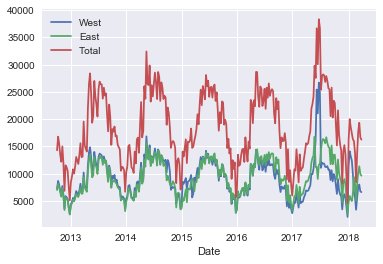

In [4]:
data.resample('W').sum().plot();

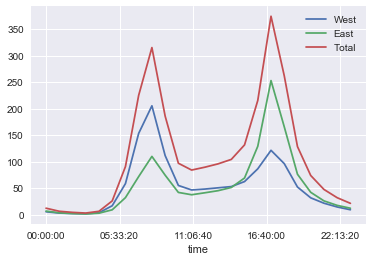

In [5]:
data.groupby(data.index.time).mean().plot();

In [6]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


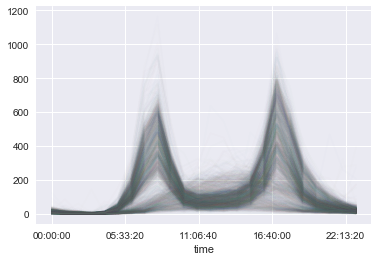

In [7]:
pivoted.plot(legend=False, alpha=0.01);

## Unsupervised analysis

In [8]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

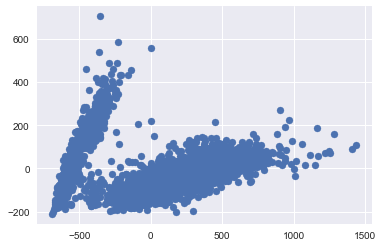

In [9]:
X = pivoted.fillna(0).T.values
X2 = PCA(2, svd_solver='full').fit_transform(X)
plt.scatter(X2[:, 0], X2[:, 1]);

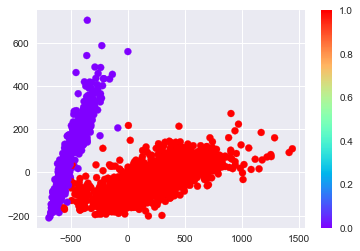

In [10]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

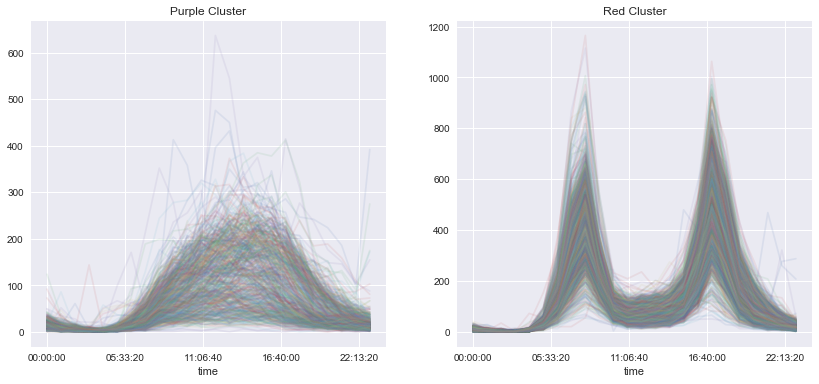

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');